In [31]:
import pandas as pd 
import matplotlib.pyplot as plt
#import seaborn as sns

In [32]:
#read data
energy_data = pd.read_csv(
    "D:/4TechLabs/team-6-energy-costs/data/energy-charts_Stromproduktion_und_Börsenstrompreise_in_Deutschland_2020_Excel.csv",
    sep=";")


#rename
energy_data.rename(columns={"Datum (MT+1)": "DatumUhrzeit", "Import Saldo": "ImportSaldo",
                            "Nicht Erneuerbar": "NichtErneuerbar",
                            "Day Ahead Auktion (DE-LU)": "DayAheadAuktion"}, inplace=True)

In [33]:
'''Hier erstelle ich eine neue Spalte mit den Monaten als Zahl um sie als Boxplot wiedergeben zu können'''
energy_data['DatumUhrzeit'] = pd.to_datetime(energy_data['DatumUhrzeit'])
energy_data['MonatZahl'] = energy_data['DatumUhrzeit'].dt.month

#print(energy_data)

## Describe

In [34]:
#all data described
described_data = energy_data.describe()
#print(described_data)

In [70]:
#describe monthly cost
grouped = energy_data.groupby(energy_data['MonatZahl'])
describe_month = grouped['DayAheadAuktion'].describe()
#print(describe_month)

- 1 Jahreshälfte günstiger als zweite

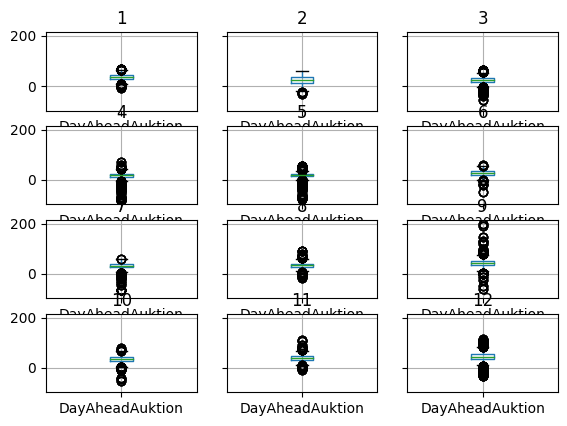

In [36]:
'''GroupBy Month = einzelne Boxplots für einzelne Monate und Preis'''
energy_data.groupby(energy_data["DatumUhrzeit"].dt.month).boxplot(column='DayAheadAuktion')
plt.show()

### Betrachtung 2019

In [37]:
#read data
energy_data19 = pd.read_csv(
    "D:/4TechLabs/team-6-energy-costs/data/energy-charts_Stromproduktion_und_Börsenstrompreise_in_Deutschland_2019_Excel.csv",
    sep=";")


#rename
energy_data19.rename(columns={"Datum (MT+1)": "DatumUhrzeit", "Import Saldo": "ImportSaldo",
                            "Nicht Erneuerbar": "NichtErneuerbar",
                            "Day Ahead Auktion (DE-LU)": "DayAheadAuktion"}, inplace=True)

'''Hier erstelle ich eine neue Spalte mit den Monaten als Zahl'''
energy_data19['DatumUhrzeit'] = pd.to_datetime(energy_data19['DatumUhrzeit'])
energy_data19['MonatZahl'] = energy_data19['DatumUhrzeit'].dt.month


In [71]:
#Beschreibung der einzelnen Monate in 2019
grouped19 = energy_data19.groupby(energy_data19['MonatZahl'])
descr_data19 = grouped19['DayAheadAuktion'].describe()
#print(descr_data19)

### Betrachtung 2019 und 2020 

Describe

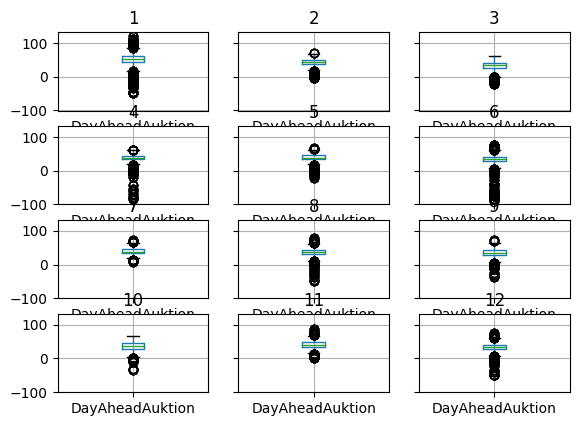

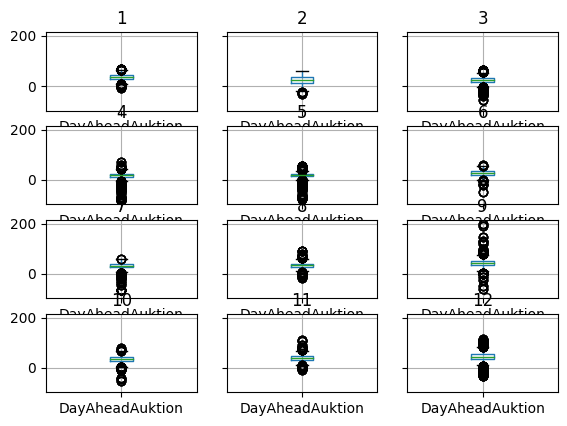

In [39]:
'''2019: GroupBy Month = einzelne Boxplots für einzelne Monate und Preis'''
energy_data19.groupby(energy_data19["DatumUhrzeit"].dt.month).boxplot(column='DayAheadAuktion')
plt.show()

'''2020: GroupBy Month = einzelne Boxplots für einzelne Monate und Preis'''
energy_data.groupby(energy_data["DatumUhrzeit"].dt.month).boxplot(column='DayAheadAuktion')
plt.show()



In [40]:
#Zusammenführung der beiden DataFrame im Preis 
energy_1920 = pd.DataFrame()
energy_1920['Preis19'] = energy_data19['DayAheadAuktion']
energy_1920['Preis20'] = energy_data['DayAheadAuktion']
energy_1920['MonatZahl'] = energy_data['MonatZahl']
#print(energy_1920)

# Summe groupby Monat
grouped_1920 = energy_1920.groupby(energy_1920['MonatZahl'])
monthly_19 = grouped_1920['Preis19'].sum()
monthly_20 = grouped_1920['Preis20'].sum()

# mean groupby Monat
monthly_mean_19 = grouped_1920['Preis19'].mean()
monthly_mean_20 = grouped_1920['Preis20'].mean()

# List mit Monaten
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


# Sum als DataFrame zur Übersicht
sum_1920 = pd.DataFrame()
sum_1920['Sum_19'] = monthly_19
sum_1920['Sum_20'] = monthly_20
sum_1920['Mean_19'] = monthly_mean_19
sum_1920['Mean_20'] = monthly_mean_20
sum_1920['Monat'] = months
print(sum_1920)



              Sum_19     Sum_20    Mean_19    Mean_20  Monat
MonatZahl                                                   
1          147055.60  104096.64  49.413844  34.978710      1
2          119506.48   61002.56  42.926178  21.911839      2
3           90317.84   67017.48  30.348737  22.519315      3
4          105240.68   49101.68  36.541903  17.049194      4
5          113048.44   52392.12  37.986707  17.604879      5
6           93931.92   75540.00  32.615250  26.229167      6
7          119317.88   89503.04  40.093374  30.074946      7
8          108173.20  103831.76  36.348522  34.889704      8
9          104193.28  125792.92  36.178222  43.678097      9
10         108925.04  101052.76  36.601156  33.955901     10
11         119101.92  111733.96  41.354833  38.796514     11
12          91079.64  125057.44  31.624875  43.422722     12


- 2019 einiges Teurer als 2020
- in der ersten Jahrenhälfte größere Variabilität als in der zweiten 

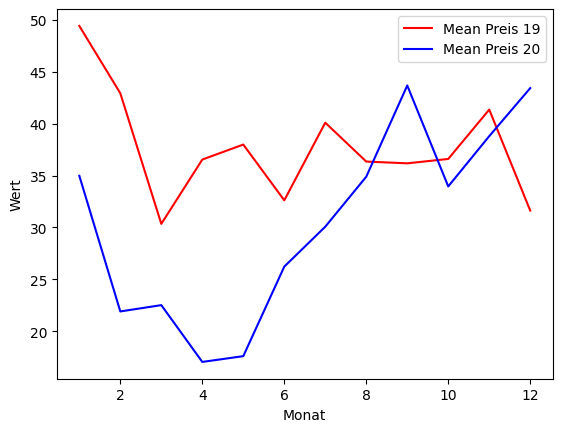

In [76]:

plt.plot(sum_1920['Monat'], sum_1920['Mean_19'], color='red', label='Mean Preis 19')
plt.plot(sum_1920['Monat'], sum_1920['Mean_20'], color='blue', label='Mean Preis 20')
plt.xlabel('Monat')
plt.ylabel('Wert')
plt.legend()
plt.show()


Korrelation

In [41]:
#Korrelation zwischen den beiden Jahren im Preis
corr_1920 = energy_1920['Preis19'].corr(energy_1920['Preis20'])
print(corr_1920)

0.2993612964446817


- Preis_Korrelation = schwache Korrelation

## Korrelationen

In [42]:
'''Hier schaue ich nach der Korrelation zwischen Preis und allen Monaten ; corr = ca. 0.352877'''
corr_price_allmonths = energy_data['DayAheadAuktion'].corr(energy_data['MonatZahl'])


### Korrelation gesamte Einspeisemenge pro Monat

In [43]:
#Neue Spalte mit der gesamten Einspeisemenge pro Monat
energy_data['sum_energy'] = energy_data['Kernenergie'] + energy_data['NichtErneuerbar'] + energy_data['Erneuerbar']

In [44]:
#Korrelation gesamte Einspeisemenge und Preis pro Monat
monthly_correlation = energy_data.groupby('MonatZahl').apply(lambda x: x['DayAheadAuktion'].corr(x['sum_energy']))
print(monthly_correlation)

MonatZahl
1     0.361788
2     0.277382
3     0.044077
4    -0.412875
5    -0.097278
6     0.166352
7    -0.139811
8     0.062338
9     0.095437
10    0.363117
11    0.560279
12    0.464622
dtype: float64


- Jan + Feb = mittlere/schwache positive Korr
- März, Mai, Aug, Sep  = sehr nahe 0 (0.0..)
- April = mittlere neg Korr
- Jun, Jul = schwache Korr (Jun pos, Jul neg)
- Okt, Nov, Dez = mittlere pos Korr

### Korrelation einzelne Stromarten und Preis

In [69]:

corr_Kern = energy_data.groupby('MonatZahl').apply(lambda x: x['DayAheadAuktion'].corr(x['Kernenergie']))
corr_NEE = energy_data.groupby('MonatZahl').apply(lambda x: x['DayAheadAuktion'].corr(x['NichtErneuerbar']))
corr_EE = energy_data.groupby('MonatZahl').apply(lambda x: x['DayAheadAuktion'].corr(x['Erneuerbar']))

korr_df = pd.DataFrame()
korr_df['Kernenergie'] = corr_Kern
korr_df['NichtErneuerbar'] = corr_NEE
korr_df['Erneuerbar'] = corr_EE
print(korr_df)

           Kernenergie  NichtErneuerbar  Erneuerbar
MonatZahl                                          
1             0.486067         0.802410   -0.519095
2             0.798983         0.816219   -0.605900
3             0.667403         0.814526   -0.638691
4             0.552308         0.661363   -0.635914
5             0.128467         0.701089   -0.467538
6            -0.058374         0.811154   -0.385433
7             0.247633         0.814591   -0.535439
8             0.265481         0.797882   -0.380815
9             0.044174         0.687141   -0.384536
10            0.130150         0.825660   -0.477425
11            0.571606         0.864198   -0.550152
12            0.529557         0.781764   -0.625898


- Kern = größere Variabilität, pos, eher schwache Korr Mai-Okt, mittlere Nov - April, 
min: Jun (-0.05), max: Feb(0.79), Spannweite = 0.84

- NEE = wenig Variabilität, starke pos Korr, 
min: April (0.66), max: Nov (0.86), Spannweite = 0.2

- EE = wenig Variabilität, neg, mittlere - starke Korr, 
min: Aug (-0.38), max: März (-0.63), Spannweite = 0.25

### Inwiefern beeinflusst der vergangene Energiepreis den zukünftigen Energiepreis?

In [46]:

#ChatGPT: 

# Verschieben der Datenreihe um eine Zeile, um den vergangenen Wert zu erhalten
energy_data['DayAheadAuktion_Lag1'] = energy_data['DayAheadAuktion'].shift(1)

# Korrelation berechnen
correlation = energy_data['DayAheadAuktion'].corr(energy_data['DayAheadAuktion_Lag1'])

print(correlation)


0.9863582529744177



- sehr starke positive Korrelation! 

## Betrachtung Klimadaten

### Sonne

In [47]:
sonne_data = pd.read_csv("D:/4TechLabs/team-6-energy-costs/data/energy-charts_Globale_Solarstrahlung_in_Deutschland_im_Jahr_2020_Excel.csv", 
sep = ';')

#rename
sonne_data.rename(columns={"Date (UTC)": "DatumUhrzeit"}, inplace=True)



#Neue Spalte für Monat
sonne_data['DatumUhrzeit'] = pd.to_datetime(sonne_data['DatumUhrzeit'])
sonne_data['MonatZahl'] = sonne_data['DatumUhrzeit'].dt.month

#print(sonne_data)


#Describe
descr_sonne = sonne_data.describe()
print (descr_sonne)


             Value    MonatZahl
count  8784.000000  8784.000000
mean    136.898110     6.513661
std     204.334284     3.451430
min       0.000000     1.000000
25%       0.000000     4.000000
50%      10.000000     7.000000
75%     212.250000    10.000000
max     910.000000    12.000000


In [48]:
# Summe groupby Monat
grouped_sonne = sonne_data.groupby(sonne_data['MonatZahl'])
monthly_sonne = grouped_sonne['Value'].sum()

print(monthly_sonne)


MonatZahl
1      25314
2      39268
3      98185
4     164943
5     174145
6     165759
7     174936
8     148991
9     110590
10     50131
11     32387
12     17864
Name: Value, dtype: int64


In [49]:
'''Hier schaue ich nach der Korrelation zwischen Value und allen Monaten ; corr = ca.-0.068'''
corr_sun_allmonths = sonne_data['Value'].corr(sonne_data['MonatZahl'])
print(corr_sun_allmonths)

-0.06870672808654259


### Wind

In [50]:
wind_data = pd.read_csv("D:/4TechLabs/team-6-energy-costs/data/energy-charts_Windgeschwindigkeit_in_Deutschland_im_Jahr_2020_Excel.csv", 
sep = ';')

#rename
wind_data.rename(columns={"Date (UTC)": "DatumUhrzeit"}, inplace=True)



#Neue Spalte für Monat
wind_data['DatumUhrzeit'] = pd.to_datetime(wind_data['DatumUhrzeit'])
wind_data['MonatZahl'] = wind_data['DatumUhrzeit'].dt.month

print(wind_data)

descr_wind = wind_data.describe()

#print(descr_wind)

            DatumUhrzeit  Value  MonatZahl
0    2020-01-01 00:00:00    2.4          1
1    2020-01-01 01:00:00    2.4          1
2    2020-01-01 02:00:00    2.5          1
3    2020-01-01 03:00:00    2.4          1
4    2020-01-01 04:00:00    2.4          1
...                  ...    ...        ...
8779 2020-12-31 19:00:00    2.8         12
8780 2020-12-31 20:00:00    2.8         12
8781 2020-12-31 21:00:00    2.7         12
8782 2020-12-31 22:00:00    2.6         12
8783 2020-12-31 23:00:00    2.6         12

[8784 rows x 3 columns]


In [51]:
# Summe groupby Monat
grouped_wind = wind_data.groupby(wind_data['MonatZahl'])
monthly_wind = grouped_wind['Value'].sum()

print(monthly_wind)

MonatZahl
1     3091.4
2     4155.6
3     3293.5
4     2516.7
5     2501.1
6     2301.9
7     2370.0
8     2228.9
9     2035.6
10    2867.1
11    2458.1
12    2661.2
Name: Value, dtype: float64


### Neues DataFrame mit monatlichen Kosten (energydata) + summe_sonne + summe_wind

In [52]:

sum_month_price = grouped['DayAheadAuktion'].sum()

klima_data = pd.DataFrame()
klima_data['DayAheadAuktion'] = sum_month_price
klima_data['Einspeisemenge'] = energy_data['sum_energy']
klima_data['Sonne'] = monthly_sonne
klima_data['Wind'] = monthly_wind

print(klima_data)

           DayAheadAuktion  Einspeisemenge   Sonne    Wind
MonatZahl                                                 
1                104096.64       52092.796   25314  3091.4
2                 61002.56       52059.062   39268  4155.6
3                 67017.48       52101.871   98185  3293.5
4                 49101.68       52198.786  164943  2516.7
5                 52392.12       52133.098  174145  2501.1
6                 75540.00       52175.041  165759  2301.9
7                 89503.04       52330.184  174936  2370.0
8                103831.76       52486.806  148991  2228.9
9                125792.92       52473.207  110590  2035.6
10               101052.76       52570.907   50131  2867.1
11               111733.96       52724.019   32387  2458.1
12               129590.08       52683.869   17864  2661.2


### Korrelation 

In [60]:
# Preis und Value von Sonne und Wind 
corr_sonne_price = klima_data['DayAheadAuktion'].corr(klima_data['Sonne'])
corr_wind_price = klima_data['DayAheadAuktion'].corr(klima_data['Wind'])

print(corr_sonne_price)
print(corr_wind_price)

-0.5049288033197764
-0.3637772897106626


In [61]:
# Einspeisemenge und Value von Sonne und Wind 
corr_sonne_amount = klima_data['Einspeisemenge'].corr(klima_data['Sonne'])
corr_wind_amount = klima_data['Einspeisemenge'].corr(klima_data['Wind'])

print(corr_sonne_amount)
print(corr_wind_amount)

-0.3351543783710715
-0.4754923696475423


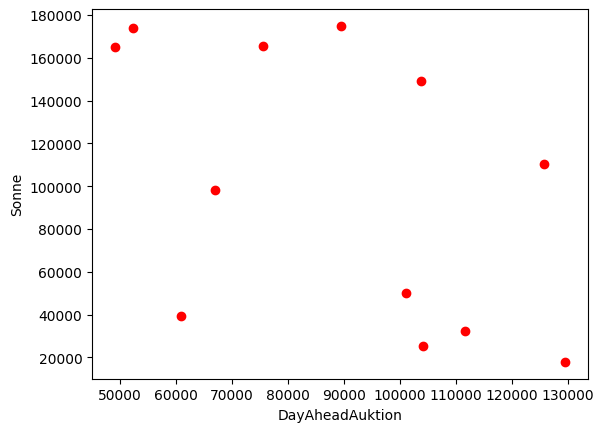

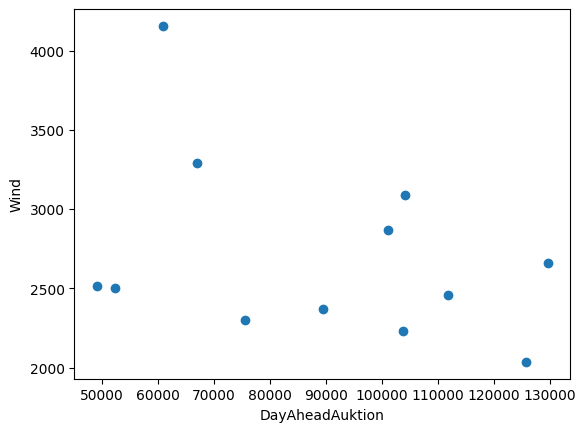

In [84]:
plt.scatter(klima_data['DayAheadAuktion'], klima_data['Sonne'], color='red')
plt.xlabel('DayAheadAuktion')
plt.ylabel('Sonne')
plt.show()

plt.scatter(klima_data['DayAheadAuktion'], klima_data['Wind'])
plt.xlabel('DayAheadAuktion')
plt.ylabel('Wind')
plt.show()

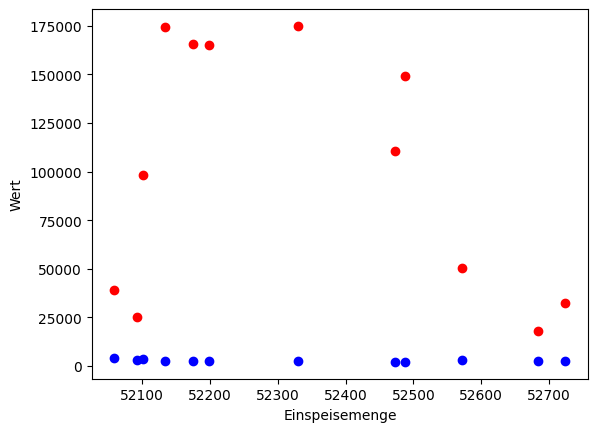

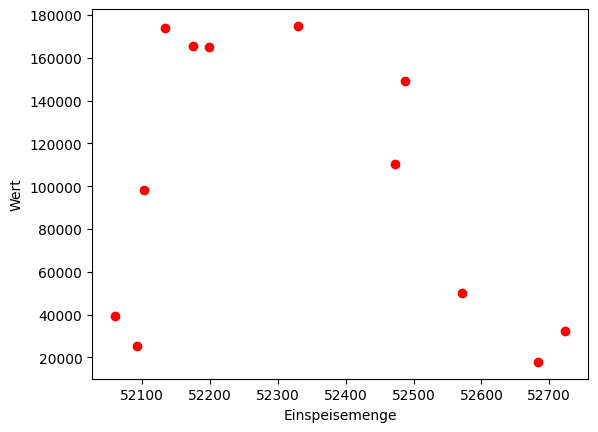

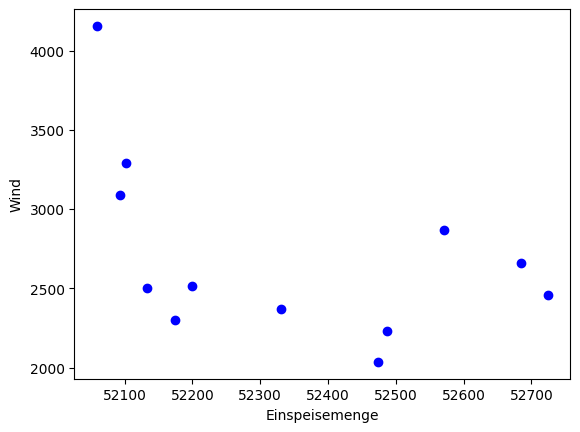

In [86]:
plt.scatter(klima_data['Einspeisemenge'], klima_data['Sonne'], color='red')
plt.scatter(klima_data['Einspeisemenge'], klima_data['Wind'], color = 'blue')
plt.xlabel('Einspeisemenge')
plt.ylabel('Wert')
plt.show()


plt.scatter(klima_data['Einspeisemenge'], klima_data['Sonne'], color='red')
plt.xlabel('Einspeisemenge')
plt.ylabel('Wert')
plt.show()

plt.scatter(klima_data['Einspeisemenge'], klima_data['Wind'], color = 'blue')
plt.xlabel('Einspeisemenge')
plt.ylabel('Wind')
plt.show()
